### PROJETO DE ANÁLISE DE DADOS: FATORES DE ANSIEDADE E DEPRESSÃO ###

# Importação biblioteca #

In [1]:
%pip install pandas 
%pip install matplotlib
%pip install seaborn
%pip install numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [3]:


try:
    df = pd.read_csv('anxiety_depression_data.csv')
    print("Arquivo 'anxiety_depression_data.csv' carregado com sucesso.")
except FileNotFoundError:
    print("ERRO: Arquivo não encontrado.")
    df = pd.DataFrame()

if not df.empty:

    df['Substance_Use'] = np.where(df['Substance_Use'].str.contains('None', na=False), 'Non-user', df['Substance_Use'])
    print("Comando robusto para renomear 'None' para 'Non-user' foi executado.")

    category_order_substance = ['Non-user', 'Occasional', 'Frequent']
    print("Ordem das categorias definida.")

    print("\nDataFrame 'df' corrigido.")
else:
    print("\nA preparação falhou porque o arquivo não foi carregado.")

Arquivo 'anxiety_depression_data.csv' carregado com sucesso.
Comando robusto para renomear 'None' para 'Non-user' foi executado.
Ordem das categorias definida.

DataFrame 'df' corrigido.


In [4]:
pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')
plt.style.use('seaborn-v0_8-darkgrid')

# Carregamento e inspeção dos dados #

In [5]:
if not df.empty:
    print("\n--- 1.1 Visualizando as 5 primeiras linhas ---")
    print(df.head())

    print("\n" + "="*80 + "\n")

    print("--- 1.2 Informações Gerais do DataFrame (Tipos de Dados e Nulos) ---")
    df.info()

    print("\n" + "="*80 + "\n")


--- 1.1 Visualizando as 5 primeiras linhas ---
   Age  Gender Education_Level Employment_Status  Sleep_Hours  \
0   56    Male      Bachelor's        Unemployed          6.0   
1   69  Female      Bachelor's           Retired          8.8   
2   46  Female        Master's          Employed          5.3   
3   32  Female     High School        Unemployed          8.8   
4   60  Female      Bachelor's           Retired          7.2   

   Physical_Activity_Hrs  Social_Support_Score  Anxiety_Score  \
0                    0.4                     3              4   
1                    2.8                     6             18   
2                    1.6                     5              5   
3                    0.5                     4              6   
4                    0.7                     2              7   

   Depression_Score  Stress_Level  Family_History_Mental_Illness  \
0                 2             9                              0   
1                 7             6 

In [6]:
print("Verificação de Dados Duplicados ---")
num_duplicates = df.duplicated().sum()
if num_duplicates == 0:
    print(f"Não há linhas duplicadas. (Total: {num_duplicates})")
else:
    print(f"⚠️ Encontradas {num_duplicates} linhas duplicadas. Recomenda-se remoção.")

Verificação de Dados Duplicados ---
Não há linhas duplicadas. (Total: 0)


In [7]:
print("\nVerificação de Valores Nulos ---")
null_counts = df.isnull().sum()
if null_counts.sum() == 0:
    print("✅ Não há valores nulos em nenhuma coluna.")
else:
    print("Foram encontrados valores nulos nas seguintes colunas:")
    print(null_counts[null_counts > 0])


Verificação de Valores Nulos ---
Foram encontrados valores nulos nas seguintes colunas:
Medication_Use    747
Substance_Use     834
dtype: int64


# Análise de perfil e comportamento #

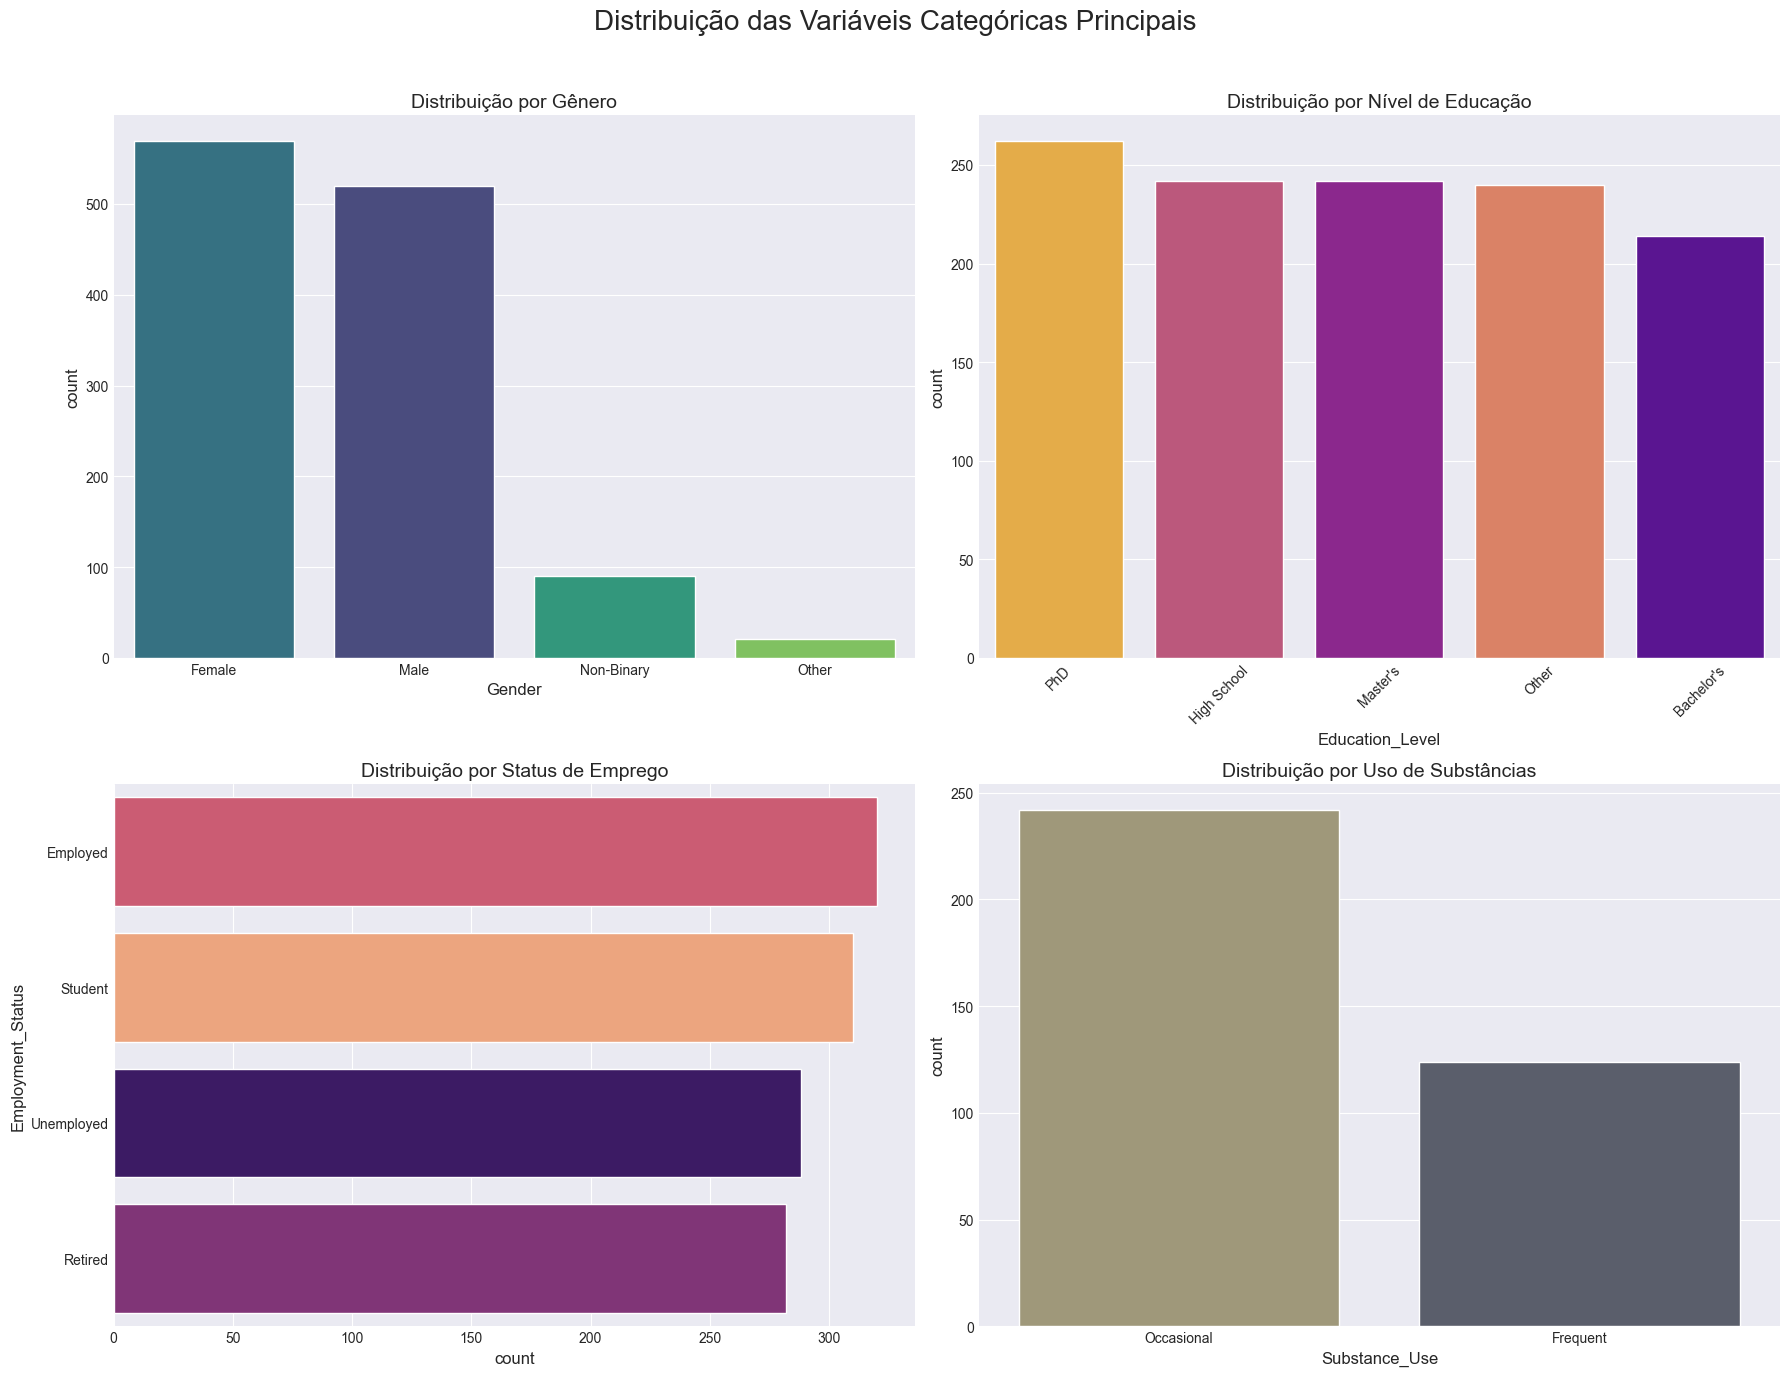

In [8]:
plot_configs = [
    {
        'column': 'Gender',
        'title': 'Distribuição por Gênero',
        'palette': 'viridis',
        'orientation': 'vertical'
    },
    {
        'column': 'Education_Level',
        'title': 'Distribuição por Nível de Educação',
        'palette': 'plasma',
        'orientation': 'vertical',
        'rotate_labels': True 
    },
    {
        'column': 'Employment_Status',
        'title': 'Distribuição por Status de Emprego',
        'palette': 'magma',
        'orientation': 'horizontal'
    },
    {
        'column': 'Substance_Use',
        'title': 'Distribuição por Uso de Substâncias',
        'palette': 'cividis',
        'orientation': 'vertical'
    }
]

fig, axes = plt.subplots(2, 2, figsize=(18, 14))
fig.suptitle('Distribuição das Variáveis Categóricas Principais', fontsize=20)

axes_flat = axes.flatten()

for i, config in enumerate(plot_configs):
    ax = axes_flat[i]
    col = config['column']
    
    order = df[col].value_counts().index
    
    if config['orientation'] == 'vertical':
        sns.countplot(ax=ax, data=df, x=col, order=order, palette=config['palette'], 
                        hue=col, legend=False)
    else: 
        sns.countplot(ax=ax, data=df, y=col, order=order, palette=config['palette'],
                        hue=col, legend=False)
    
    ax.set_title(config['title'], fontsize=14)
    ax.set_xlabel(ax.get_xlabel(), fontsize=12)
    ax.set_ylabel(ax.get_ylabel(), fontsize=12)
    
    
    if config.get('rotate_labels'):
        ax.tick_params(axis='x', rotation=45)


plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


# Análise de correlação entre fatores #


Gerando mapa de calor de correlação...


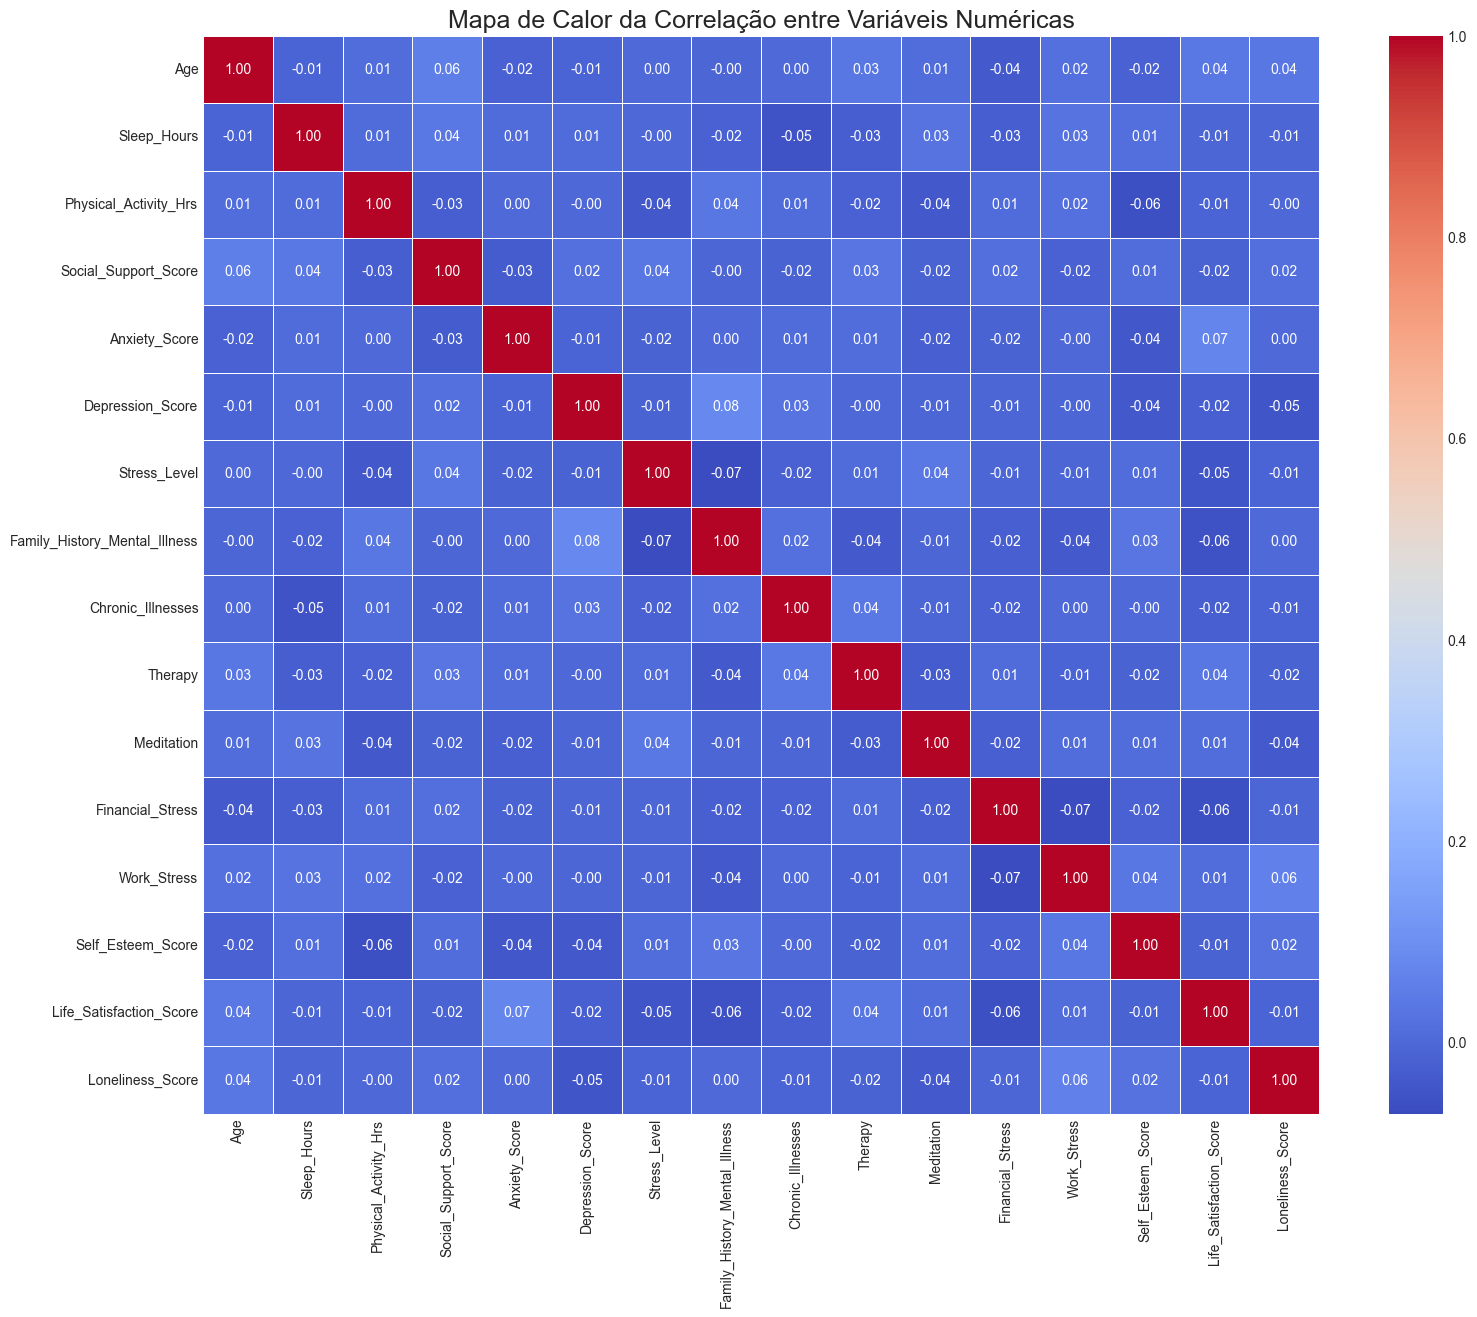

In [9]:
print("\nGerando mapa de calor de correlação...")
numeric_df = df.select_dtypes(include=np.number)
corr_matrix = numeric_df.corr()

plt.figure(figsize=(18, 14))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Mapa de Calor da Correlação entre Variáveis Numéricas', fontsize=18)
plt.show()

# Análise de nível de educação vs estresse no trabalho #

Pontuação média de Estresse no Trabalho por Nível de Educação:
Education_Level
PhD            4.79
Other          4.88
Master's       4.88
High School    4.90
Bachelor's     5.02
Name: Work_Stress, dtype: float64


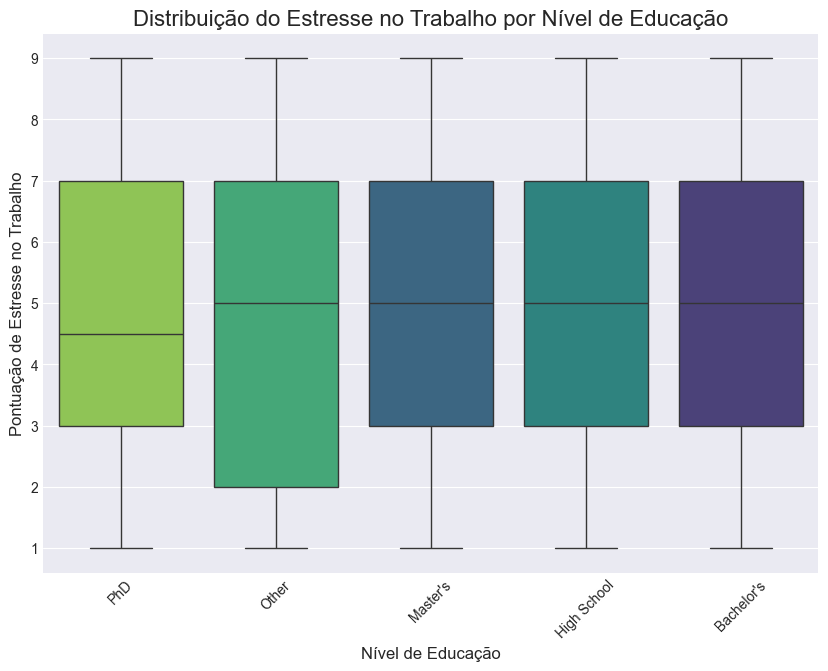

In [10]:
mean_stress_education = df.groupby('Education_Level')['Work_Stress'].mean().round(2).sort_values()
print("Pontuação média de Estresse no Trabalho por Nível de Educação:")
print(mean_stress_education)

plt.figure(figsize=(10, 7))
sns.boxplot(x='Education_Level', y='Work_Stress', data=df, order=mean_stress_education.index, 
            palette='viridis', hue='Education_Level', legend=False)
plt.title('Distribuição do Estresse no Trabalho por Nível de Educação', fontsize=16)
plt.xlabel('Nível de Educação', fontsize=12)
plt.ylabel('Pontuação de Estresse no Trabalho', fontsize=12)
plt.xticks(rotation=45)
plt.show()

# Apoio Social vs Solidão #


Apoio Social vs. Solidão -
Correlação entre Apoio Social e Solidão: 0.02


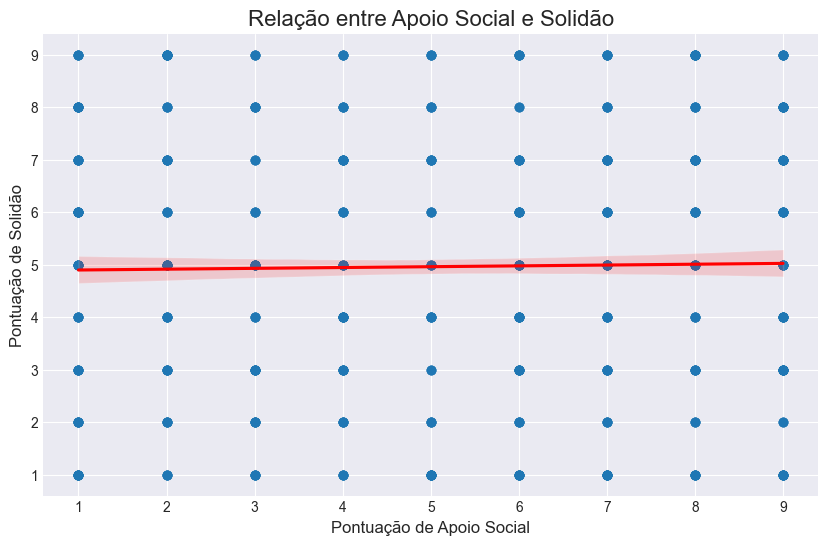

In [11]:
print("\nApoio Social vs. Solidão -")

correlation_support_loneliness = df[['Social_Support_Score', 'Loneliness_Score']].corr().iloc[0, 1]
print(f"Correlação entre Apoio Social e Solidão: {correlation_support_loneliness:.2f}")

plt.figure(figsize=(10, 6))
sns.regplot(x='Social_Support_Score', y='Loneliness_Score', data=df, line_kws={"color": "red"}, scatter_kws={'alpha':0.5})
plt.title('Relação entre Apoio Social e Solidão', fontsize=16)
plt.xlabel('Pontuação de Apoio Social', fontsize=12)
plt.ylabel('Pontuação de Solidão', fontsize=12)
plt.show()

# Histórico Familiar vs Depressão #


Histórico Familiar de Doença Mental vs. Depressão
Pontuação média de Depressão por Histórico Familiar:
Family_History_Status
Com Histórico    11.34
Sem Histórico    10.36
Name: Depression_Score, dtype: float64


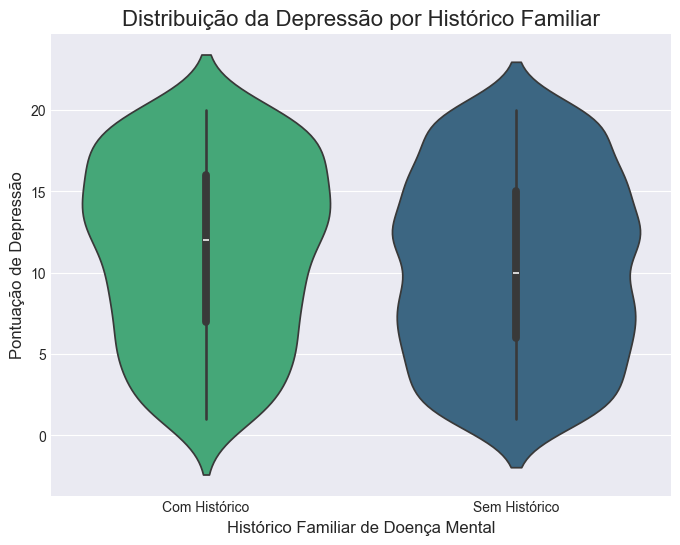

In [12]:
print("\nHistórico Familiar de Doença Mental vs. Depressão")

df['Family_History_Status'] = df['Family_History_Mental_Illness'].map({0: 'Sem Histórico', 1: 'Com Histórico'})

mean_depression_history = df.groupby('Family_History_Status')['Depression_Score'].mean().round(2)
print("Pontuação média de Depressão por Histórico Familiar:")
print(mean_depression_history)

plt.figure(figsize=(8, 6))
sns.violinplot(x='Family_History_Status', y='Depression_Score', data=df, order=['Com Histórico', 'Sem Histórico'],
                palette='viridis', hue='Family_History_Status', legend=False)
plt.title('Distribuição da Depressão por Histórico Familiar', fontsize=16)
plt.xlabel('Histórico Familiar de Doença Mental', fontsize=12)
plt.ylabel('Pontuação de Depressão', fontsize=12)
plt.show()

# Horas de Atividade Física vs Horas de Sono #


Horas de Atividade Física vs. Horas de Sono
Correlação entre Horas de Atividade Física e Horas de Sono: 0.01


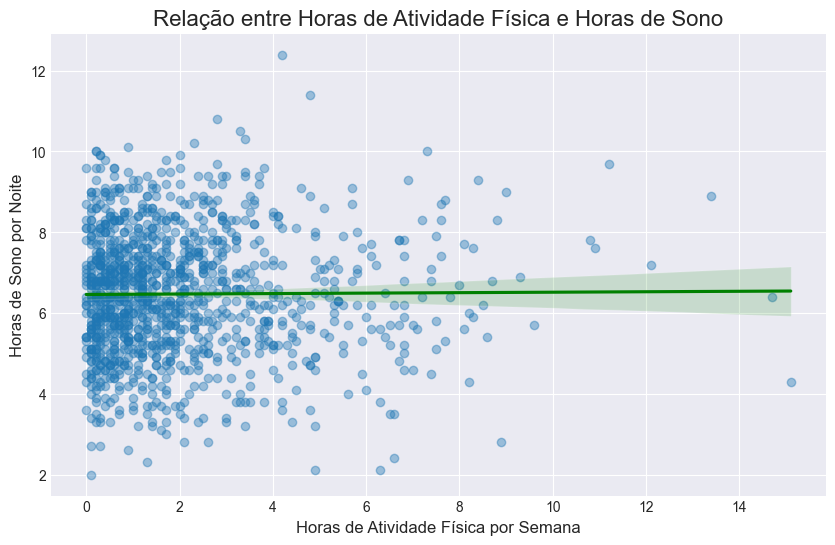

In [13]:
print("\nHoras de Atividade Física vs. Horas de Sono")

correlation_activity_sleep = df[['Physical_Activity_Hrs', 'Sleep_Hours']].corr().iloc[0, 1]
print(f"Correlação entre Horas de Atividade Física e Horas de Sono: {correlation_activity_sleep:.2f}")

plt.figure(figsize=(10, 6))
sns.regplot(x='Physical_Activity_Hrs', y='Sleep_Hours', data=df, line_kws={"color": "green"}, scatter_kws={'alpha':0.4})
plt.title('Relação entre Horas de Atividade Física e Horas de Sono', fontsize=16)
plt.xlabel('Horas de Atividade Física por Semana', fontsize=12)
plt.ylabel('Horas de Sono por Noite', fontsize=12)
plt.show()

# Uso de Substâncias vs Depressão e Ansiedade #

Uso de Substâncias vs. Depressão e Ansiedade 
Pontuação média de Depressão por Uso de Substâncias:
Substance_Use
None            NaN
Occasional    10.31
Frequent      11.51
Name: Depression_Score, dtype: float64

Pontuação média de Ansiedade por Uso de Substâncias:
Substance_Use
None            NaN
Occasional    10.74
Frequent       9.85
Name: Anxiety_Score, dtype: float64


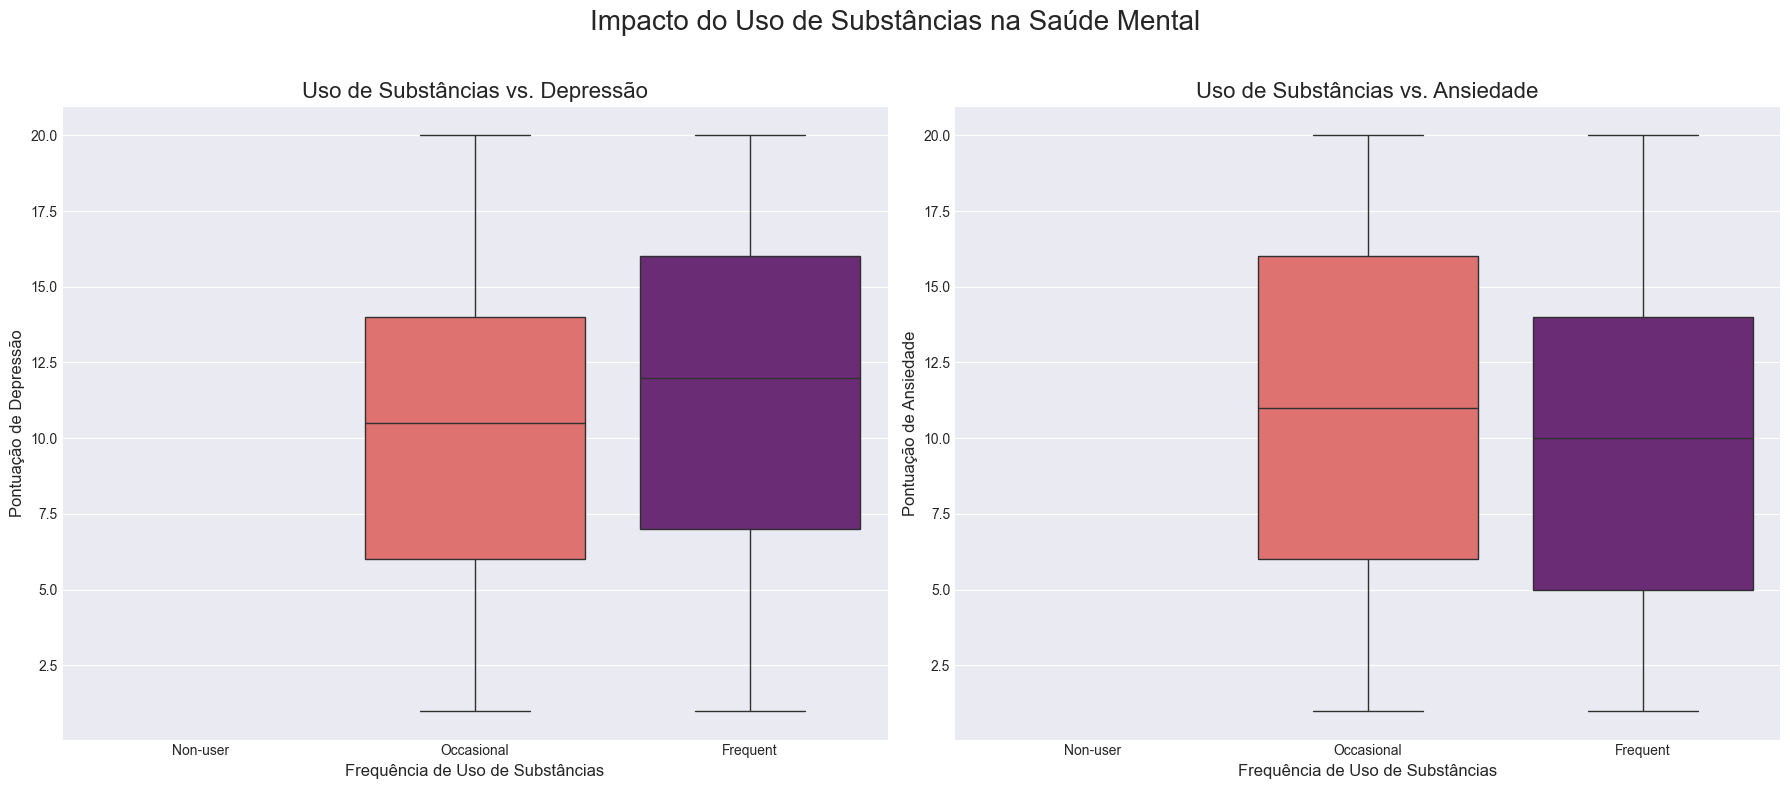

In [14]:
print("Uso de Substâncias vs. Depressão e Ansiedade ")

category_order = ['None', 'Occasional', 'Frequent']

mean_depression_substance = df.groupby('Substance_Use')['Depression_Score'].mean().round(2).reindex(category_order)
mean_anxiety_substance = df.groupby('Substance_Use')['Anxiety_Score'].mean().round(2).reindex(category_order)

print("Pontuação média de Depressão por Uso de Substâncias:")
print(mean_depression_substance)
print("\nPontuação média de Ansiedade por Uso de Substâncias:")
print(mean_anxiety_substance)

fig, axes = plt.subplots(1, 2, figsize=(18, 8))
fig.suptitle('Impacto do Uso de Substâncias na Saúde Mental', fontsize=20)
sns.boxplot(ax=axes[0], x='Substance_Use', y='Depression_Score', data=df, order=category_order_substance,
            palette='magma', hue='Substance_Use', legend=False)
axes[0].set_title('Uso de Substâncias vs. Depressão', fontsize=16)
axes[0].set_xlabel('Frequência de Uso de Substâncias', fontsize=12)
axes[0].set_ylabel('Pontuação de Depressão', fontsize=12)

sns.boxplot(ax=axes[1], x='Substance_Use', y='Anxiety_Score', data=df, order=category_order_substance,
            palette='magma', hue='Substance_Use', legend=False)
axes[1].set_title('Uso de Substâncias vs. Ansiedade', fontsize=16)
axes[1].set_xlabel('Frequência de Uso de Substâncias', fontsize=12)
axes[1].set_ylabel('Pontuação de Ansiedade', fontsize=12)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Interação entre Estresse no Trabalho e Gênero #

Interação entre Estresse no Trabalho e Gênero


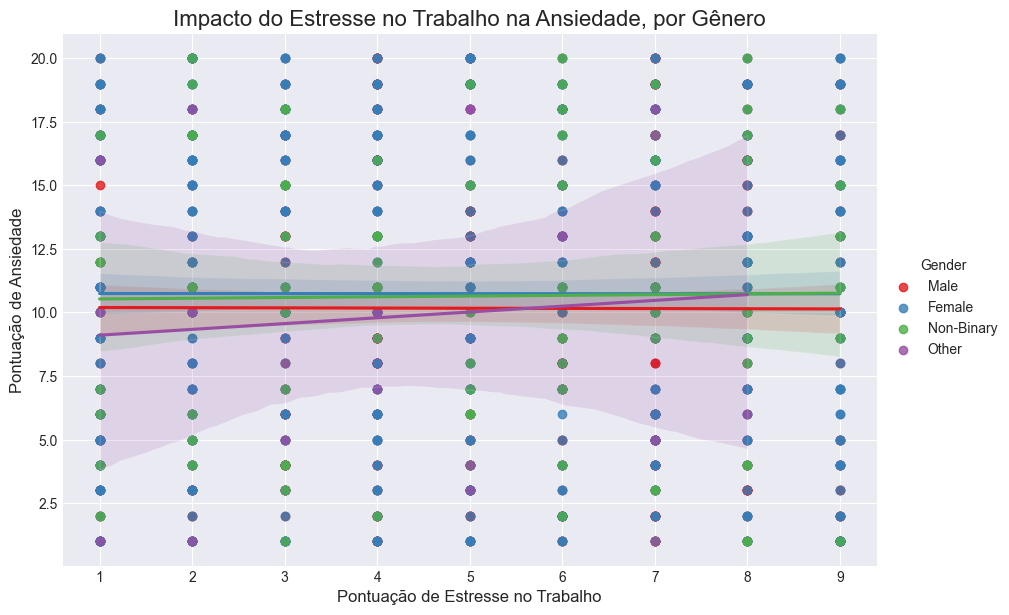

In [15]:
print("Interação entre Estresse no Trabalho e Gênero")

sns.lmplot(x='Work_Stress', y='Anxiety_Score', hue='Gender', data=df,
            palette='Set1', height=6, aspect=1.5)
plt.title('Impacto do Estresse no Trabalho na Ansiedade, por Gênero', fontsize=16)
plt.xlabel('Pontuação de Estresse no Trabalho', fontsize=12)
plt.ylabel('Pontuação de Ansiedade', fontsize=12)
plt.show()

# Criação e Análise de um "Perfil de Risco" #


erfil de Risco vs. Status de Emprego
Pontuação Média do Perfil de Risco por Status de Emprego:
Employment_Status
Unemployed    26.26
Retired       26.23
Student       26.04
Employed      25.91
Name: Risk_Score, dtype: float64


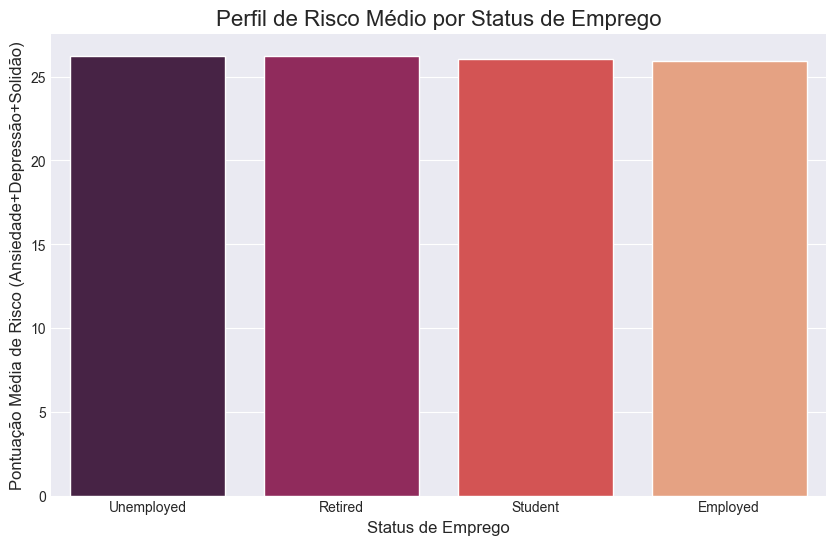

In [16]:
print("\nerfil de Risco vs. Status de Emprego")

df['Risk_Score'] = df['Anxiety_Score'] + df['Depression_Score'] + df['Loneliness_Score']

mean_risk_employment = df.groupby('Employment_Status')['Risk_Score'].mean().round(2).sort_values(ascending=False)
print("Pontuação Média do Perfil de Risco por Status de Emprego:")
print(mean_risk_employment)

plt.figure(figsize=(10, 6))
sns.barplot(x=mean_risk_employment.index, y=mean_risk_employment.values,
            palette='rocket', hue=mean_risk_employment.index, legend=False)
plt.title('Perfil de Risco Médio por Status de Emprego', fontsize=16)
plt.xlabel('Status de Emprego', fontsize=12)
plt.ylabel('Pontuação Média de Risco (Ansiedade+Depressão+Solidão)', fontsize=12)
plt.show()

# Análises de Subgrupos - Terapia e Histórico Familiar #


Efetividade da Terapia em Subgrupos


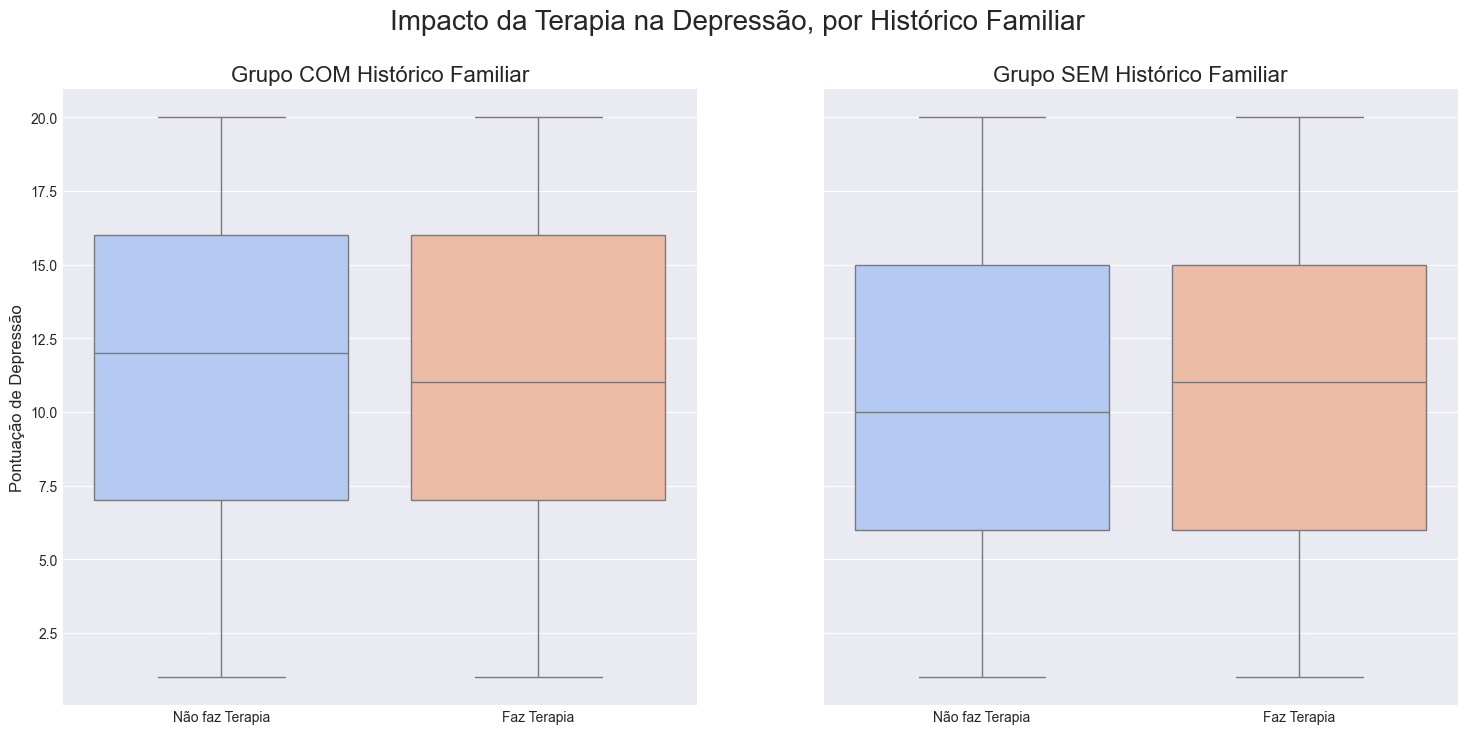

In [17]:
print("\nEfetividade da Terapia em Subgrupos")

df['Family_History_Status'] = df['Family_History_Mental_Illness'].map({0: 'Sem Histórico', 1: 'Com Histórico'})
df['Therapy_Status'] = df['Therapy'].map({0: 'Não faz Terapia', 1: 'Faz Terapia'})

fig, axes = plt.subplots(1, 2, figsize=(18, 8), sharey=True) 
fig.suptitle('Impacto da Terapia na Depressão, por Histórico Familiar', fontsize=20)

sns.boxplot(ax=axes[0], x='Therapy_Status', y='Depression_Score', data=df[df['Family_History_Status'] == 'Com Histórico'],
            palette='coolwarm', hue='Therapy_Status', legend=False)
axes[0].set_title('Grupo COM Histórico Familiar', fontsize=16)
axes[0].set_xlabel('')
axes[0].set_ylabel('Pontuação de Depressão', fontsize=12)

sns.boxplot(ax=axes[1], x='Therapy_Status', y='Depression_Score', data=df[df['Family_History_Status'] == 'Sem Histórico'],
            palette='coolwarm', hue='Therapy_Status', legend=False)
axes[1].set_title('Grupo SEM Histórico Familiar', fontsize=16)
axes[1].set_xlabel('')
axes[1].set_ylabel('') 
plt.show()

# Índice de Hábitos Saudáveis vs. Satisfação com a Vida #

\Índice de Hábitos Saudáveis vs. Satisfação com a Vida
Correlação entre Índice de Hábitos Saudáveis e Satisfação com a Vida: -0.01


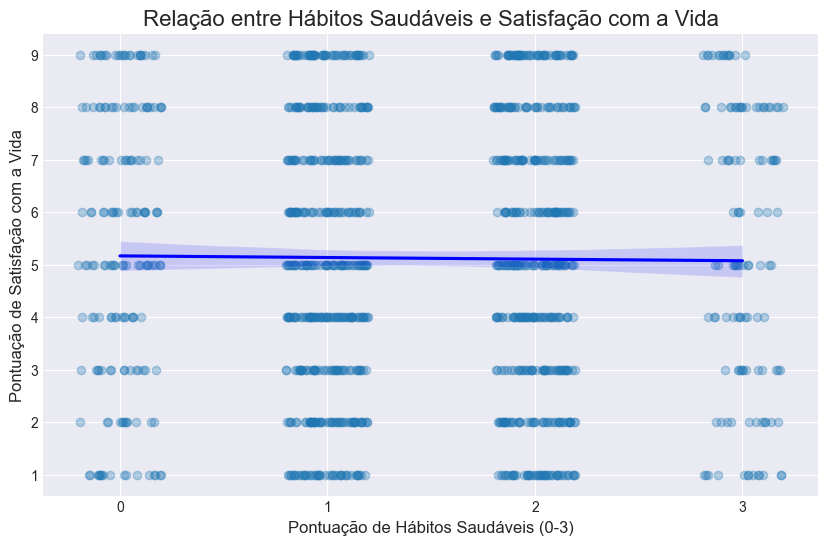

In [18]:
print("\Índice de Hábitos Saudáveis vs. Satisfação com a Vida")

sleep_threshold = df['Sleep_Hours'].median()
activity_threshold = df['Physical_Activity_Hrs'].median()

df['Healthy_Habits_Score'] = (
    (df['Sleep_Hours'] >= sleep_threshold).astype(int) +
    (df['Physical_Activity_Hrs'] >= activity_threshold).astype(int) +
    df['Meditation']
)

correlation_habits_satisfaction = df[['Healthy_Habits_Score', 'Life_Satisfaction_Score']].corr().iloc[0, 1]
print(f"Correlação entre Índice de Hábitos Saudáveis e Satisfação com a Vida: {correlation_habits_satisfaction:.2f}")

plt.figure(figsize=(10, 6))
sns.regplot(x='Healthy_Habits_Score', y='Life_Satisfaction_Score', data=df, 
            x_jitter=0.2, 
            line_kws={"color": "blue"}, scatter_kws={'alpha':0.3})
plt.title('Relação entre Hábitos Saudáveis e Satisfação com a Vida', fontsize=16)
plt.xlabel('Pontuação de Hábitos Saudáveis (0-3)', fontsize=12)
plt.ylabel('Pontuação de Satisfação com a Vida', fontsize=12)
plt.xticks([0, 1, 2, 3])
plt.show()

### Análises mais avançadas (machine learning) ###

# Importações para Machine Learning #

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [20]:
sns.set_style("whitegrid")
plt.style.use('seaborn-v0_8-darkgrid')

# Modelo Preditivo (Arvóre de Decisão) #

Acurácia do Modelo de Árvore de Decisão: 70.83%


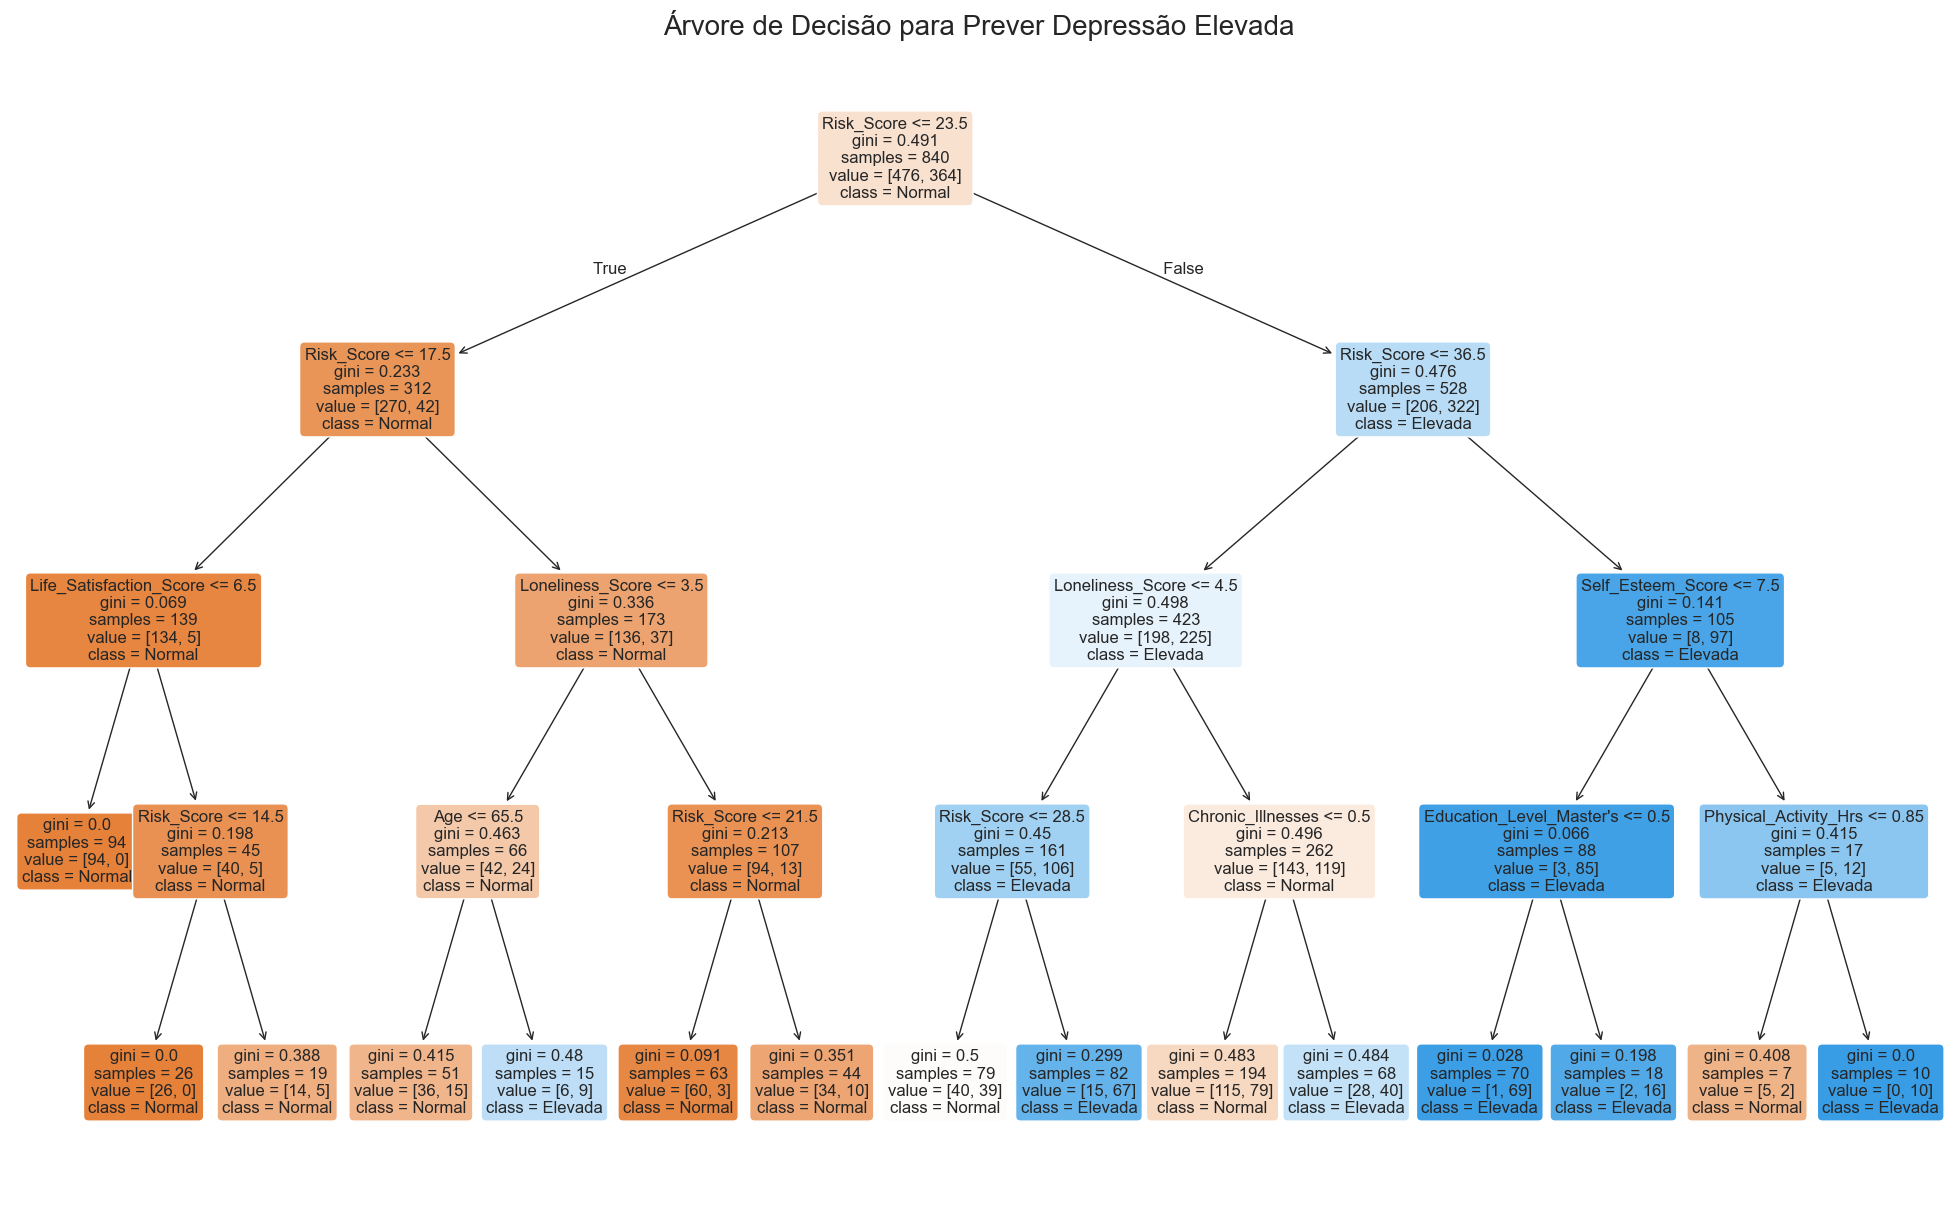

In [21]:
df['Depressao_Elevada'] = (df['Depression_Score'] > 12).astype(int)
features = df.drop(['Depression_Score', 'Depressao_Elevada', 'Anxiety_Score', 'Stress_Level'], axis=1)
features_encoded = pd.get_dummies(features, drop_first=True) 
target = df['Depressao_Elevada']
X_train, X_test, y_train, y_test = train_test_split(features_encoded, target, test_size=0.3, random_state=42)

tree_model = DecisionTreeClassifier(max_depth=4, random_state=42) 
tree_model.fit(X_train, y_train)

y_pred = tree_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do Modelo de Árvore de Decisão: {accuracy:.2%}")

plt.figure(figsize=(25, 15))
plot_tree(tree_model, feature_names=features_encoded.columns, class_names=['Normal', 'Elevada'], filled=True, rounded=True, fontsize=12)
plt.title("Árvore de Decisão para Prever Depressão Elevada", fontsize=20)
plt.show()

In [22]:
from sklearn.tree import export_text

# Análise da Árvore de Decisão #

In [23]:
df['Depressao_Elevada'] = (df['Depression_Score'] > 12).astype(int)
features = df.drop(['Depression_Score', 'Depressao_Elevada', 'Anxiety_Score', 'Stress_Level'], axis=1)
features = features.drop(['Cluster', 'Family_History_Status', 'Therapy_Status', 'Estresse_Financeiro_Alto', 'Healthy_Habits_Score', 'Meditation_Status'], axis=1, errors='ignore')

features_encoded = pd.get_dummies(features, drop_first=True)
target = df['Depressao_Elevada']
X_train, X_test, y_train, y_test = train_test_split(features_encoded, target, test_size=0.3, random_state=42)

tree_model = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_model.fit(X_train, y_train)

feature_names = list(features_encoded.columns)
tree_rules = export_text(tree_model, feature_names=feature_names)

print(f"\nRegras da Árvore de Decisão (lê-se de cima para baixo):")
print("="*60)
print(tree_rules)
print("="*60)

y_pred = tree_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do Modelo: {accuracy:.2%}")

print("\nAnálise da Árvore de Decisão em formato de texto concluída.")


Regras da Árvore de Decisão (lê-se de cima para baixo):
|--- Risk_Score <= 23.50
|   |--- Risk_Score <= 17.50
|   |   |--- Life_Satisfaction_Score <= 6.50
|   |   |   |--- class: 0
|   |   |--- Life_Satisfaction_Score >  6.50
|   |   |   |--- Risk_Score <= 14.50
|   |   |   |   |--- class: 0
|   |   |   |--- Risk_Score >  14.50
|   |   |   |   |--- class: 0
|   |--- Risk_Score >  17.50
|   |   |--- Loneliness_Score <= 3.50
|   |   |   |--- Age <= 65.50
|   |   |   |   |--- class: 0
|   |   |   |--- Age >  65.50
|   |   |   |   |--- class: 1
|   |   |--- Loneliness_Score >  3.50
|   |   |   |--- Risk_Score <= 21.50
|   |   |   |   |--- class: 0
|   |   |   |--- Risk_Score >  21.50
|   |   |   |   |--- class: 0
|--- Risk_Score >  23.50
|   |--- Risk_Score <= 36.50
|   |   |--- Loneliness_Score <= 4.50
|   |   |   |--- Risk_Score <= 28.50
|   |   |   |   |--- class: 0
|   |   |   |--- Risk_Score >  28.50
|   |   |   |   |--- class: 1
|   |   |--- Loneliness_Score >  4.50
|   |   |   |---

# Análise de Cluster #


16. Análise de Cluster: Encontrando Perfis de Saúde Mental


c:\Users\nise_\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] O sistema não pode encontrar o arquivo especificado
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\nise_\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Users\nise_\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\nise_\AppData\Local\Programs\Python\Python313\Lib\subprocess.py",

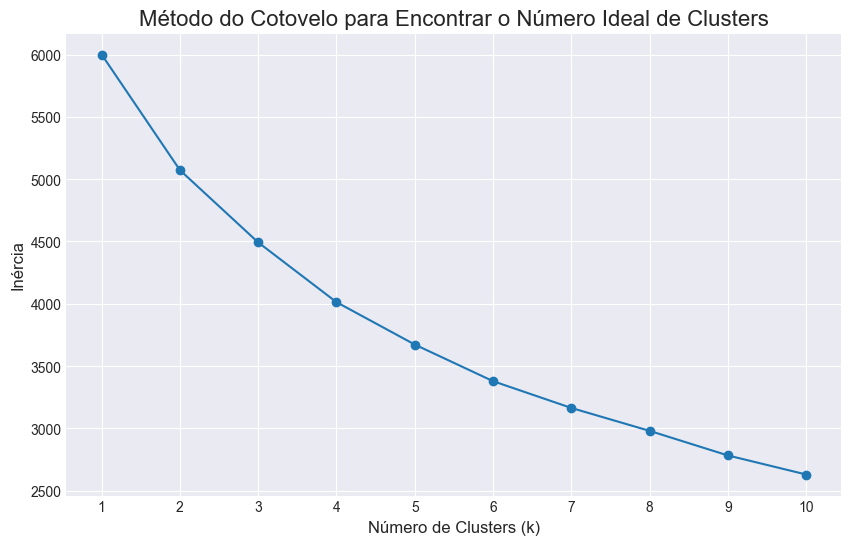

In [24]:
print("\n16. Análise de Cluster: Encontrando Perfis de Saúde Mental")

cluster_features = df[['Anxiety_Score', 'Depression_Score', 'Stress_Level', 'Loneliness_Score', 'Life_Satisfaction_Score']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(cluster_features)

#Encontrando o 'k' com Elbow Method
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Método do Cotovelo para Encontrar o Número Ideal de Clusters', fontsize=16)
plt.xlabel('Número de Clusters (k)', fontsize=12)
plt.ylabel('Inércia', fontsize=12)
plt.xticks(k_range)
plt.show()


Análise dos 3 Perfis (Clusters) Encontrados:
         Anxiety_Score  Depression_Score  Loneliness_Score  \
Cluster                                                      
0                11.96             10.95              2.84   
1                12.07              9.84              7.48   
2                 6.97             11.30              4.52   

         Life_Satisfaction_Score  
Cluster                           
0                           6.68  
1                           5.41  
2                           3.02  


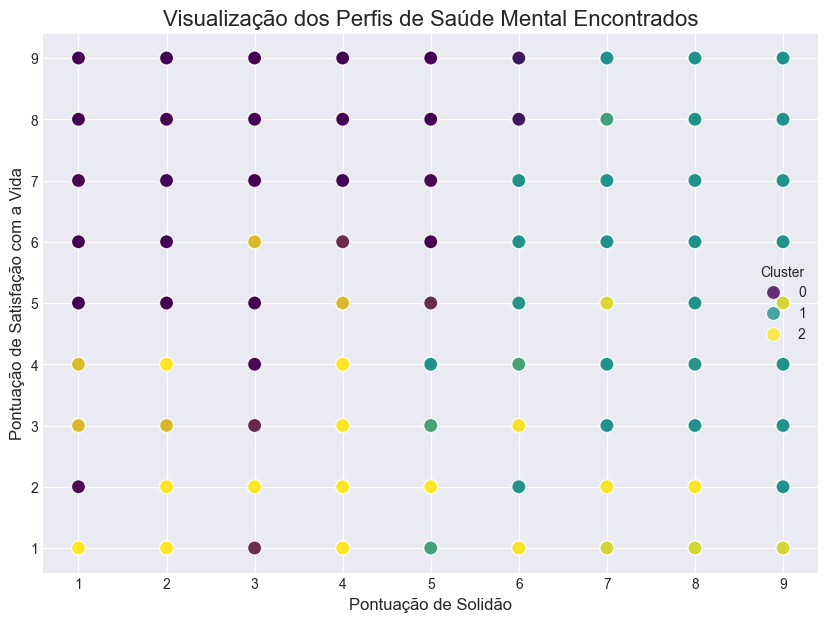

In [25]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(features_scaled)
cluster_analysis = df.groupby('Cluster')[['Anxiety_Score', 'Depression_Score', 'Loneliness_Score', 'Life_Satisfaction_Score']].mean().round(2)
print(f"\nAnálise dos {k} Perfis (Clusters) Encontrados:")
print(cluster_analysis)

plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x='Loneliness_Score', y='Life_Satisfaction_Score', hue='Cluster', palette='viridis', s=100, alpha=0.8)
plt.title('Visualização dos Perfis de Saúde Mental Encontrados', fontsize=16)
plt.xlabel('Pontuação de Solidão', fontsize=12)
plt.ylabel('Pontuação de Satisfação com a Vida', fontsize=12)
plt.show()

# Análise de Interação de Estressores #

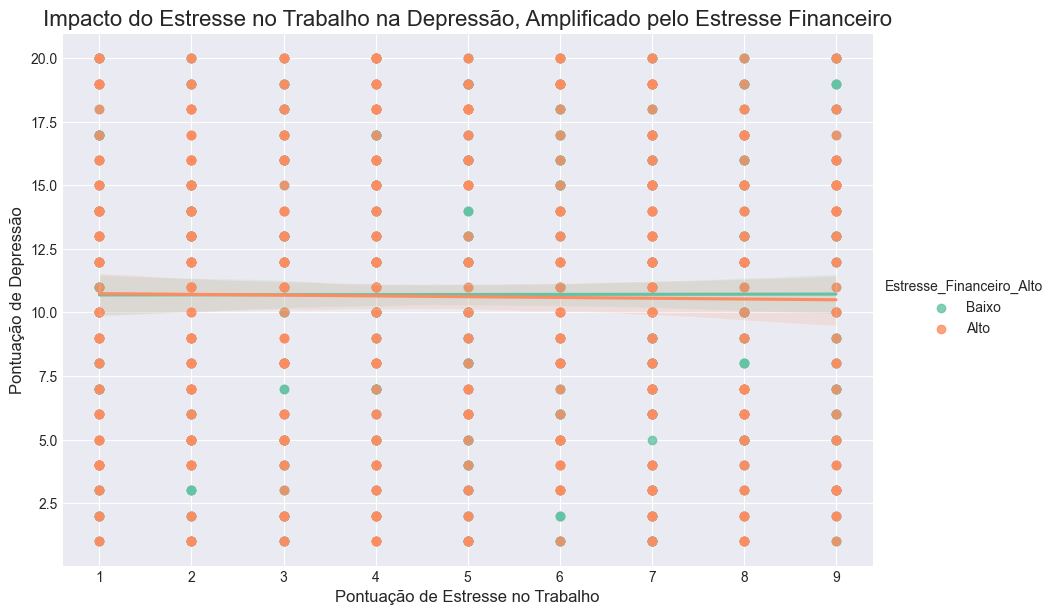

In [26]:

df['Estresse_Financeiro_Alto'] = (df['Financial_Stress'] > df['Financial_Stress'].median()).map({True: 'Alto', False: 'Baixo'})

sns.lmplot(x='Work_Stress', y='Depression_Score', hue='Estresse_Financeiro_Alto', data=df,
            palette='Set2', height=6, aspect=1.5)
plt.title('Impacto do Estresse no Trabalho na Depressão, Amplificado pelo Estresse Financeiro', fontsize=16)
plt.xlabel('Pontuação de Estresse no Trabalho', fontsize=12)
plt.ylabel('Pontuação de Depressão', fontsize=12)
plt.show()

# Análise de Mediação: O Caminho do Apoio Social para a Satisfação #


O Caminho do Apoio Social para a Satisfação
Passo 1 (A->C): Correlação Apoio Social -> Satisfação com a Vida: -0.02
Passo 2 (A->B): Correlação Apoio Social -> Solidão: 0.02
Passo 3 (B->C): Correlação Solidão -> Satisfação com a Vida: -0.01


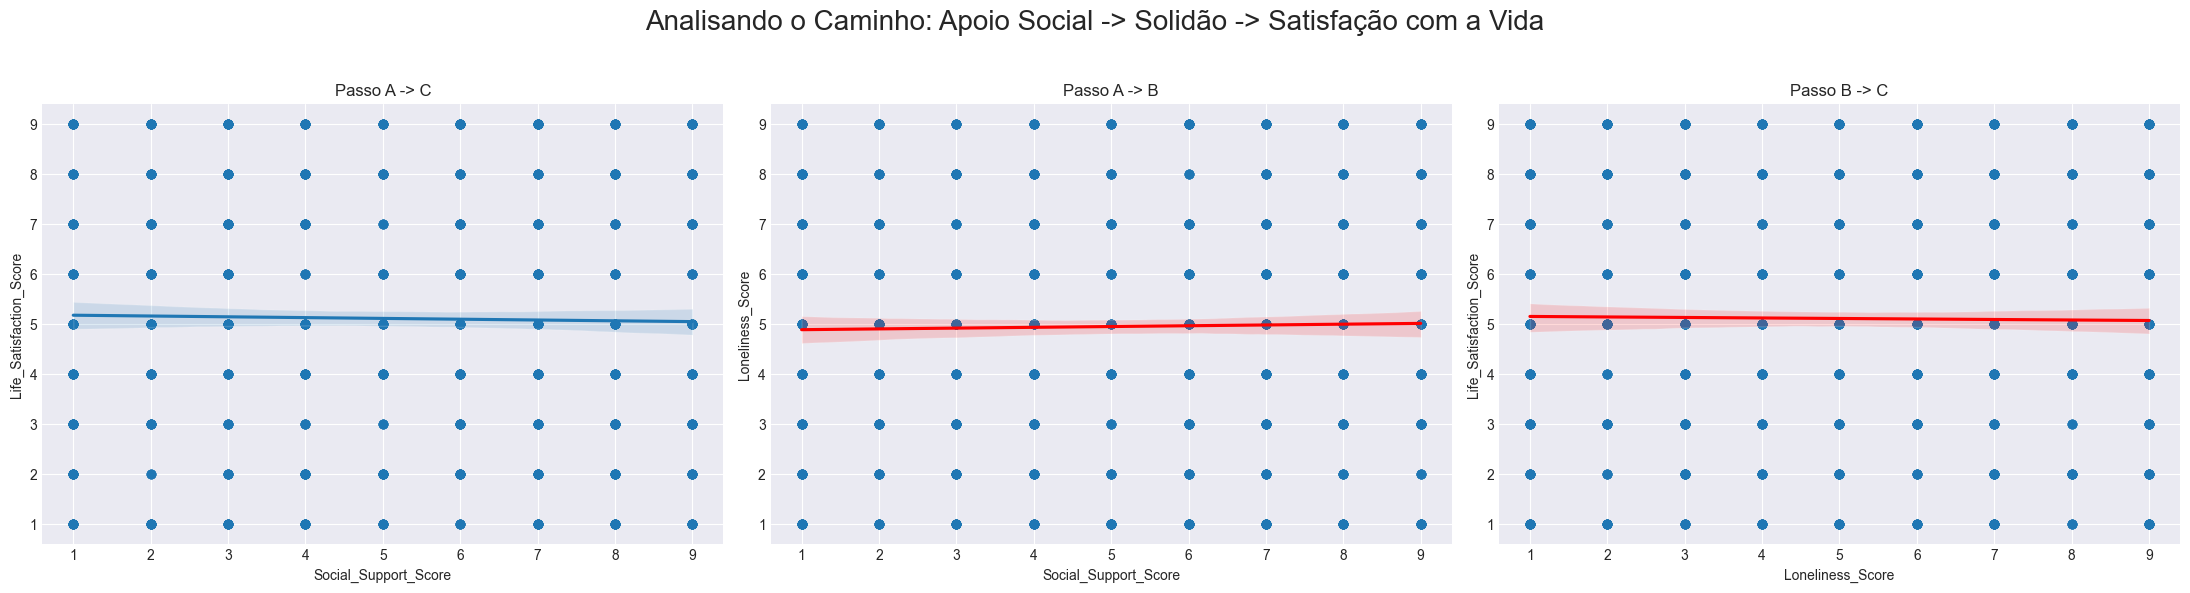

In [27]:
print("\nO Caminho do Apoio Social para a Satisfação")

corr_A_C = df[['Social_Support_Score', 'Life_Satisfaction_Score']].corr().iloc[0, 1]
corr_A_B = df[['Social_Support_Score', 'Loneliness_Score']].corr().iloc[0, 1]
corr_B_C = df[['Loneliness_Score', 'Life_Satisfaction_Score']].corr().iloc[0, 1]

print(f"Passo 1 (A->C): Correlação Apoio Social -> Satisfação com a Vida: {corr_A_C:.2f}")
print(f"Passo 2 (A->B): Correlação Apoio Social -> Solidão: {corr_A_B:.2f}")
print(f"Passo 3 (B->C): Correlação Solidão -> Satisfação com a Vida: {corr_B_C:.2f}")

fig, axes = plt.subplots(1, 3, figsize=(22, 6))
fig.suptitle('Analisando o Caminho: Apoio Social -> Solidão -> Satisfação com a Vida', fontsize=20)
sns.regplot(ax=axes[0], data=df, x='Social_Support_Score', y='Life_Satisfaction_Score').set_title('Passo A -> C')
sns.regplot(ax=axes[1], data=df, x='Social_Support_Score', y='Loneliness_Score', line_kws={'color':'red'}).set_title('Passo A -> B')
sns.regplot(ax=axes[2], data=df, x='Loneliness_Score', y='Life_Satisfaction_Score', line_kws={'color':'red'}).set_title('Passo B -> C')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()



# Análises focadas em Uso de Substâncias #

# Uso de Substâncias vs Horas de Sono #

Análise: Uso de Substâncias vs. Horas de Sono
Média de Horas de Sono por Uso de Substâncias:
Substance_Use
None           NaN
Occasional    6.55
Frequent      6.53
Name: Sleep_Hours, dtype: float64


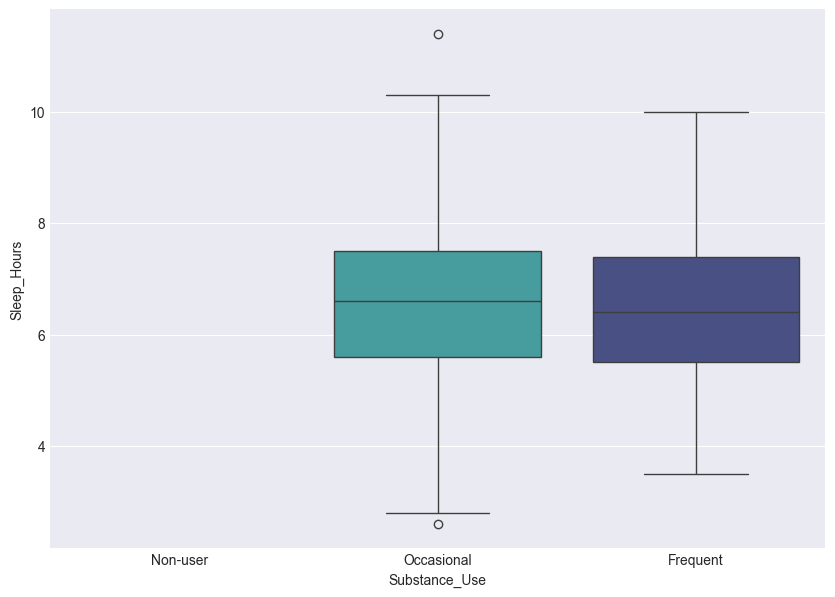

In [28]:
print("Análise: Uso de Substâncias vs. Horas de Sono")

mean_sleep_substance = df.groupby('Substance_Use')['Sleep_Hours'].mean().round(2).reindex(category_order)
print("Média de Horas de Sono por Uso de Substâncias:")
print(mean_sleep_substance)

plt.figure(figsize=(10, 7))
sns.boxplot(x='Substance_Use', y='Sleep_Hours', data=df, order=category_order_substance,
        palette='mako', hue='Substance_Use', legend=False)
plt.show()

# Uso de Substâncias vs Tipos de Estresse #


Análise: Uso de Substâncias vs. Tipos de Estresse


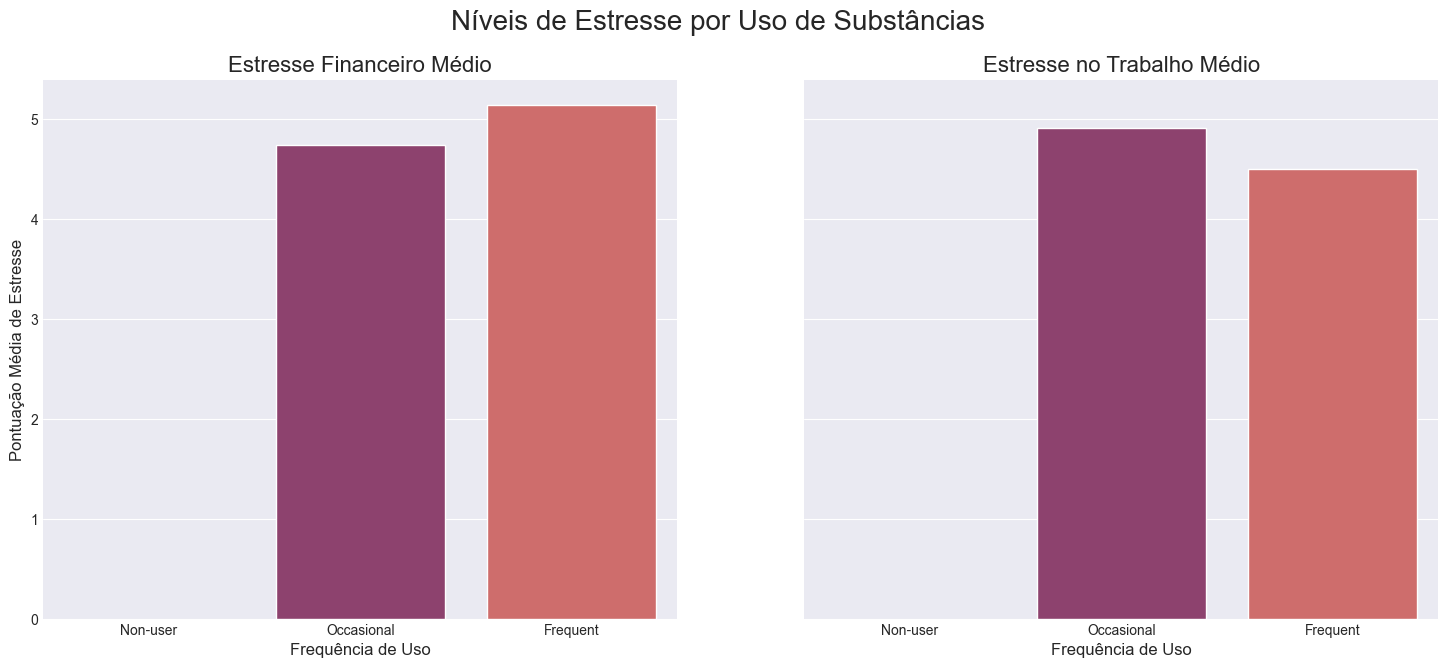

In [29]:
print("\nAnálise: Uso de Substâncias vs. Tipos de Estresse")

fig, axes = plt.subplots(1, 2, figsize=(18, 7), sharey=True)
fig.suptitle('Níveis de Estresse por Uso de Substâncias', fontsize=20)

# Gráfico 1: Estresse Financeiro
sns.barplot(ax=axes[0], x='Substance_Use', y='Financial_Stress', data=df, order=category_order_substance,
            palette='flare', hue='Substance_Use', legend=False, errorbar=None)
axes[0].set_title('Estresse Financeiro Médio', fontsize=16)
axes[0].set_xlabel('Frequência de Uso', fontsize=12)
axes[0].set_ylabel('Pontuação Média de Estresse', fontsize=12)

# Gráfico 2: Estresse no Trabalho
sns.barplot(ax=axes[1], x='Substance_Use', y='Work_Stress', data=df, order=category_order_substance,
            palette='flare', hue='Substance_Use', legend=False, errorbar=None)
axes[1].set_title('Estresse no Trabalho Médio', fontsize=16)
axes[1].set_xlabel('Frequência de Uso', fontsize=12)
axes[1].set_ylabel('') 
plt.show()

# Análise: Uso de Substâncias vs. Idade #

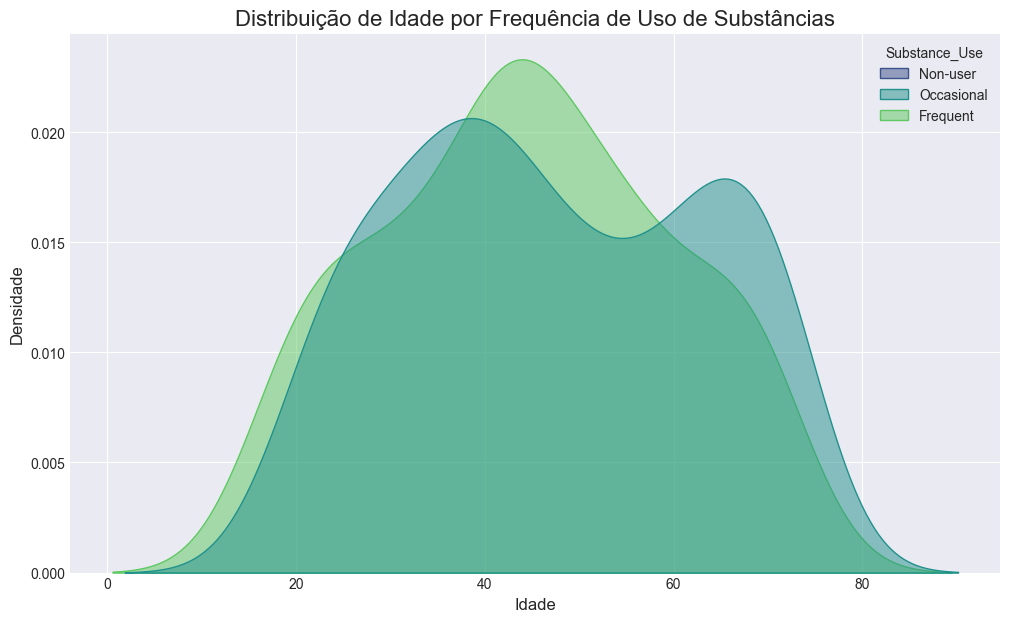

In [30]:
plt.figure(figsize=(12, 7))
sns.kdeplot(data=df, x='Age', hue='Substance_Use', hue_order=category_order_substance,
            fill=True, alpha=0.5, palette='viridis', common_norm=False)
plt.title('Distribuição de Idade por Frequência de Uso de Substâncias', fontsize=16)
plt.xlabel('Idade', fontsize=12)
plt.ylabel('Densidade', fontsize=12)
plt.show()

# Análise: Uso de Substâncias vs. Autoestima #

Pontuação Média de Autoestima por Uso de Substâncias:
Substance_Use
None           NaN
Occasional    4.99
Frequent      5.62
Name: Self_Esteem_Score, dtype: float64


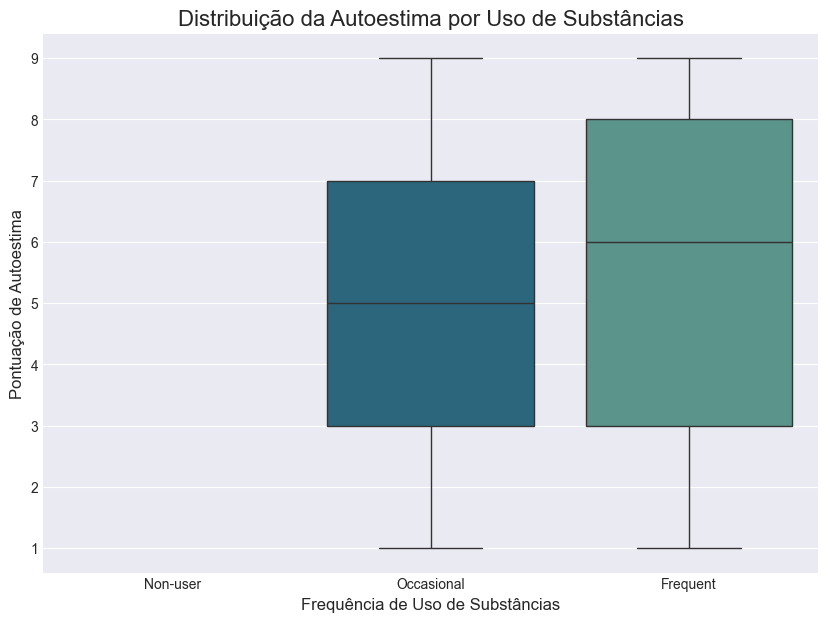

In [31]:
mean_selfesteem_substance = df.groupby('Substance_Use')['Self_Esteem_Score'].mean().round(2).reindex(category_order)
print("Pontuação Média de Autoestima por Uso de Substâncias:")
print(mean_selfesteem_substance)

plt.figure(figsize=(10, 7))
sns.boxplot(x='Substance_Use', y='Self_Esteem_Score', data=df, order=category_order_substance,
            palette='crest', hue='Substance_Use', legend=False)
plt.title('Distribuição da Autoestima por Uso de Substâncias', fontsize=16)
plt.xlabel('Frequência de Uso de Substâncias', fontsize=12)
plt.ylabel('Pontuação de Autoestima', fontsize=12)
plt.show()

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(14, 8))
report_text = "RELATÓRIO DE DIAGNÓSTICO DO DATAFRAME\n"
report_text += "="*40 + "\n\n"

try:
# Carregamos o DataFrame do zero
df_diag = pd.read_csv('anxiety_depression_data.csv')
report_text += "1. Arquivo 'anxiety_depression_data.csv' carregado com sucesso.\n\n"

# limpeza e a substituição
df_diag['Substance_Use'] = df_diag['Substance_Use'].str.strip()
df_diag['Substance_Use'] = df_diag['Substance_Use'].replace({'None': 'Non-user'})
report_text += "2. Comando para renomear 'None' para 'Non-user' foi executado.\n\n"

counts = df_diag['Substance_Use'].value_counts()
report_text += "3. Contagem de valores na coluna 'Substance_Use' (APÓS A MODIFICAÇÃO):\n"
report_text += "-------------------------------------------------------------\n"
report_text += counts.to_string()
report_text += "\n-------------------------------------------------------------\n\n"

head_df = df_diag.head()
report_text += "4. Primeiras 5 linhas do DataFrame (APÓS A MODIFICAÇÃO):\n"
report_text += "-------------------------------------------------------------\n"
report_text += head_df.to_string()
report_text += "\n-------------------------------------------------------------\n"

except Exception as e:
report_text = f"Ocorreu um erro durante o diagnóstico: {str(e)}"

ax.text(0.01, 0.99, report_text, transform=ax.transAxes, fontsize=11,
    verticalalignment='top', fontfamily='monospace', linespacing=1.5)

ax.axis('off')
plt.title("Relatório de Diagnóstico Visual", fontsize=16)
plt.show()

IndentationError: expected an indented block after 'try' statement on line 8 (2125339642.py, line 10)